In [18]:
import pandas as pd

filepath = 'D:\\My files\\projects\\Python\\kaggle-deep-learning-intro\\winequality-red.csv'
red_wine = pd.read_csv(filepath)

In [19]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
red_wine_size = red_wine.shape

In [22]:
input_wine_shape = (red_wine_size[1] - 1, )

#input_wine_shape = (11, )

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=input_wine_shape)
]
)

In [24]:
w, b = model.weights

print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense_5/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.5461014 ],
       [ 0.14936471],
       [ 0.59932715],
       [-0.17627162],
       [ 0.48211032],
       [ 0.6249909 ],
       [ 0.20740718],
       [ 0.45901877],
       [ 0.07077402],
       [ 0.59366566],
       [ 0.01016736]], dtype=float32)>

Bias
<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [25]:
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_wine_shape),
     layers.Dense(units=512, activation='relu'),
     layers.Dense(units=512, activation='relu'),
     layers.Dense(units=1)
]
)

In [26]:
model.compile(
    optimizer="adam",
    loss="mae"
)

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

X = red_wine.copy()
# Remove target
y = X.pop('quality')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [11]


In [28]:
history = model.fit(
    x=X,
    y=y,
    batch_size=128,
    epochs=200
)

Epoch 1/200


13/13 [==============================] - 1s 12ms/step - loss: 0.6038
Epoch 2/200
13/13 [==============================] - 0s 12ms/step - loss: 0.3221
Epoch 3/200
13/13 [==============================] - 0s 12ms/step - loss: 0.2693
Epoch 4/200
13/13 [==============================] - 0s 13ms/step - loss: 0.2155
Epoch 5/200
13/13 [==============================] - 0s 13ms/step - loss: 0.1770
Epoch 6/200
13/13 [==============================] - 0s 12ms/step - loss: 0.1449
Epoch 7/200
13/13 [==============================] - 0s 12ms/step - loss: 0.1266
Epoch 8/200
13/13 [==============================] - 0s 13ms/step - loss: 0.1185
Epoch 9/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0993
Epoch 10/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0979
Epoch 11/200
13/13 [==============================] - 0s 14ms/step - loss: 0.0992
Epoch 12/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0975
Epoch 13/200
13/13 [=================

<Axes: >

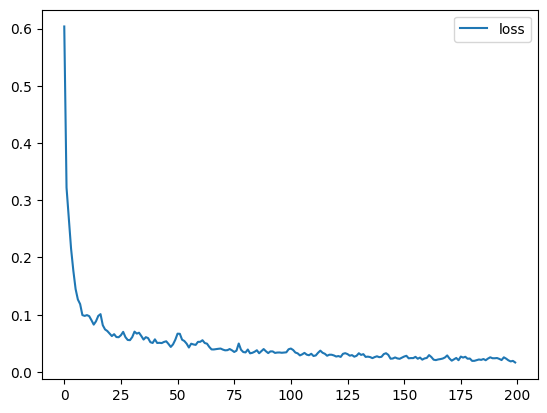

In [29]:
history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss']].plot()

In [30]:
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(
    min_delta=0.001,
    patience=5,
    restore_best_weights=True
)